## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Datasets

#### First Dataset - Amazon Review

In [3]:
Dataset_1 = pd.read_csv("Datasets/Dataset_1/train.csv", header=None, names=["polarity", "title", "text"])

In [4]:
Dataset_1.head()

,polarity,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [5]:
Dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [6]:
Dataset_1["polarity"].value_counts()

polarity
2    1800000
1    1800000
Name: count, dtype: int64

#### Second Dataset - Amazon Book Review

In [6]:
Dataset_2 = pd.read_csv("Datasets/Dataset_2/Books_rating.csv")

In [7]:
Dataset_2=Dataset_2.drop(columns="User_id")
Dataset_2=Dataset_2.drop(columns="profileName")
Dataset_2=Dataset_2.drop(columns="review/time")
Dataset_2=Dataset_2.drop(columns="Id")
Dataset_2=Dataset_2.drop(columns="Price")
Dataset_2=Dataset_2.drop(columns="review/helpfulness")

In [8]:
Dataset_2.head()

,Title,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [9]:
Dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Title           object 
 1   review/score    float64
 2   review/summary  object 
 3   review/text     object 
dtypes: float64(1), object(3)
memory usage: 91.6+ MB


In [10]:
Dataset_2["review/score"].value_counts()

review/score
5.0    1807343
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: count, dtype: int64

## Utility Functions

In [11]:
# Create a bar chart
def barchart_func(data_to_plot, figsize=(12,6), ticksrange=None, ticksname=None, 
                  title=None, xlabel=None, ylabel=None, color="blue", rotation=0,
                  xscale=None, yscale=None, show_grid=False):
    
    plt.figure(figsize=figsize)
    data_to_plot.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if ticksrange is not None and ticksname is not None:
        plt.xticks(ticksrange, ticksname, rotation=rotation)
        
    if xscale is not None:
        plt.xscale(xscale)
    
    if yscale is not None:
        plt.yscale(yscale)

    if show_grid:
        plt.grid(True)

    plt.show()

## Study and Cleaning Dataset

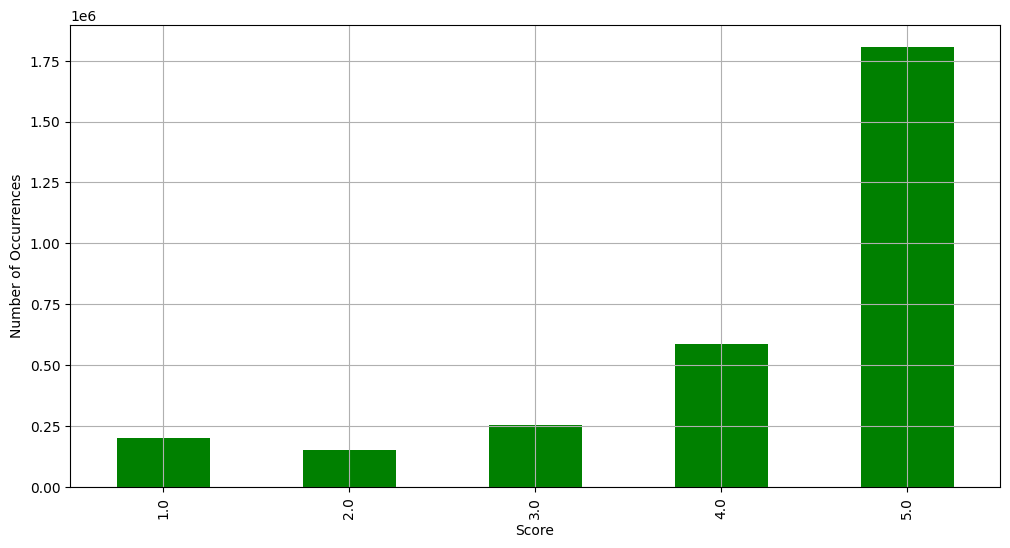

In [13]:
data_by_class = Dataset_2.groupby('review/score').size()

barchart_func(data_to_plot=data_by_class,
              ticksrange=range(len(data_by_class)),
              ticksname=data_by_class.index,
              #title='Occurences of scores in dataset',
              xlabel="Score",
              ylabel="Number of Occurrences",
              color="green",
              rotation=90,
              #yscale=None,
              show_grid=True
              )